# Ch02. Supervised Learning

- Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs. 
- Goal is to make accurate predictions for new, never-before-seen data.
- Build a model that is able to generalize as accurately as possible

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import mglearn
%matplotlib inline

In [4]:
# load the dataset for two-class classification
X, y = mglearn.datasets.make_forge()

X.shape is (26, 2)


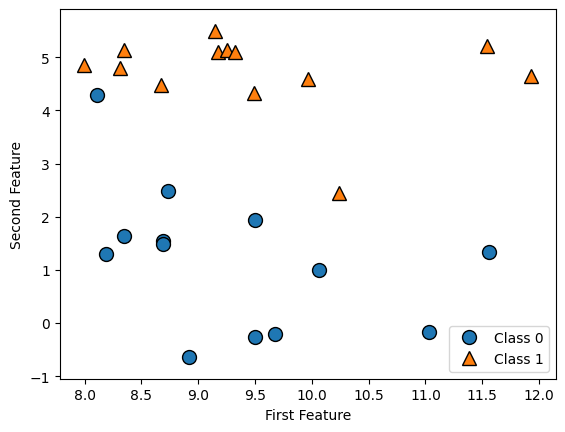

In [6]:
# plot the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print(f"X.shape is {X.shape}")

Text(0, 0.5, 'Target')

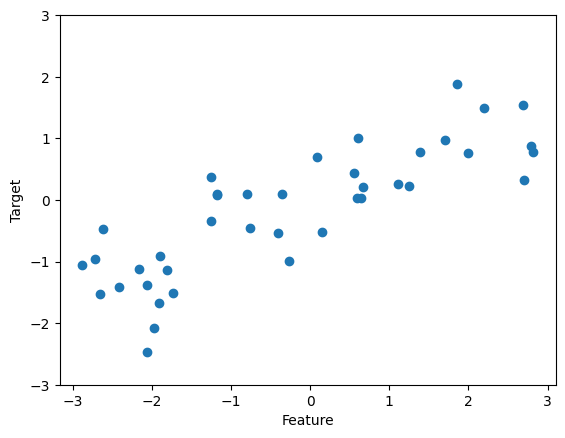

In [10]:
# load the dataset for regression
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [23]:
# Real-world classification data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys(): \n {cancer.keys()}")

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
# check the shape of this dataset
print(f"shape of cancer data: {cancer['data'].shape}")

shape of cancer data: (569, 30)


In [20]:
# count the numbe of targets
{n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}

{'malignant': 212, 'benign': 357}

In [22]:
# feature names
print(f"The feature names are: \n{cancer['feature_names']}")

The feature names are: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [27]:
# Real-world Regression Data
from sklearn.datasets import load_boston
boston = load_boston()
print(f"the shape of boston data is {boston['data'].shape}")

the shape of boston data is (506, 13)


In [31]:
# load more feature about boston data
X, y = mglearn.datasets.load_extended_boston()
print(f"the sahep of X is {X.shape}")

the sahep of X is (506, 104)


/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

## k-Nearest Neighbors

- To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”
- In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.
- When considering more than one neighbor, we use voting to assign a label. 
- This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent.

### Notes

When the number of nearest neighbors (k) is set to an even number in k-NN, there is a possibility of having a tie when determining the class label of a new data point.

In the case of a tie, there are several common approaches to resolve it:

- Majority voting: If there is a tie between two or more classes, the class label that has the majority among the tied neighbors is chosen as the predicted class.
- Distance weighting: Instead of relying solely on the counts of neighbors, the distances of the tied neighbors can be taken into account. The class label of the new data point is assigned based on a weighted voting scheme, where closer neighbors have a higher weight in the decision.
- Random selection: When there is a tie, the class label can be randomly selected from the tied classes.

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


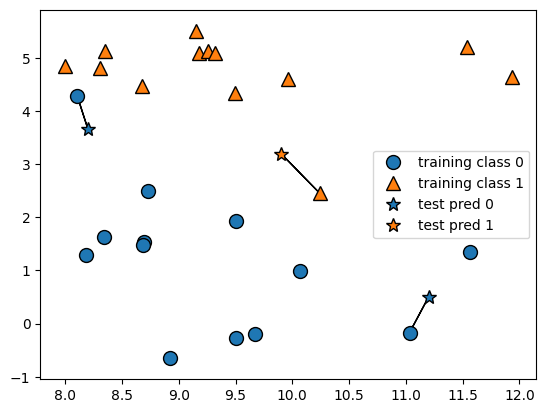

In [32]:
# k-nn when k=1
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


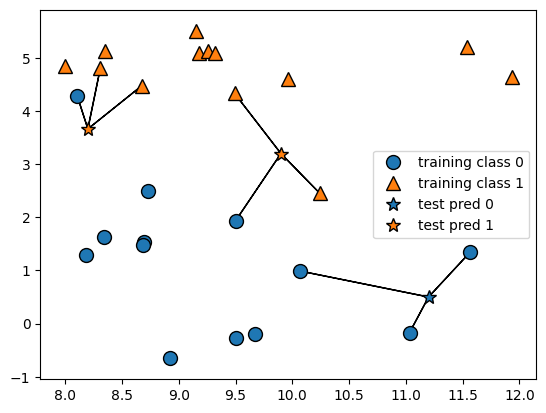

In [35]:
# k-nn when k=3
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [36]:
# K-nn model
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [39]:
# k-nn estimator with k=3
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [40]:
# fit the model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
# call predict method
clf.predict(X_test)

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0, 1, 0, 0])

In [43]:
# call score method to chec kthe accuracy
clf.score(X_test, y_test)

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8571428571428571

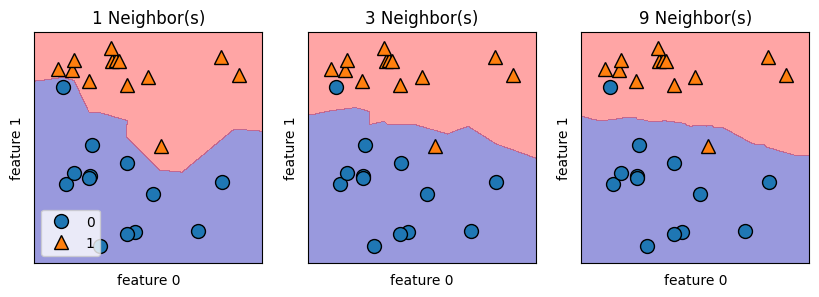

In [45]:
# visualizations of the decision boundaries
# divide between where the algorithm assigns class 0 versus where it assigns class 1
# more neighbors leads to a smoother decision boundary
# A smoother boundary corresponds to a simpler model
# using few neighbors corresponds to high model complexity
# using many neighbors corresponds to low model complexity

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} Neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [47]:
# Using real-world data to confirm the connection between model complexity and generalization
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=66)

In [51]:
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 11)

In [52]:
for n_neighbors in neighbors_setting:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fit the data to finish building the model
    clf.fit(X_train, y_train)
    # record the accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yu-jenchen/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

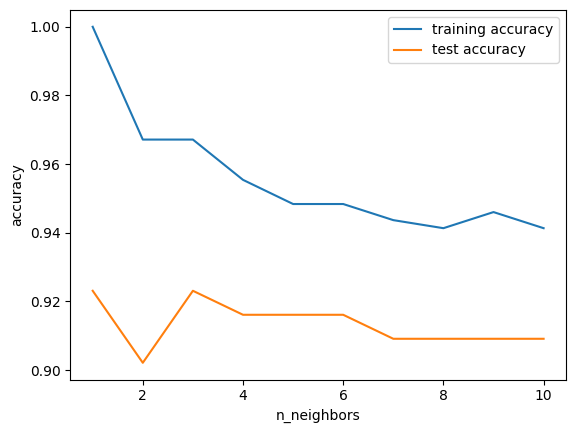

In [54]:
# The best performance is somewhere in the middle,
using around six neighbors
plt.plot(neighbors_setting, training_accuracy, label='training accuracy')
plt.plot(neighbors_setting, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

### k-neighbors regression

- Choosing the number of neighbors (k): The 'k' represents the number of nearest neighbors that the algorithm considers. Selecting an appropriate k value is critical.
- Calculating the distance: For a new unlabeled data point, the algorithm calculates its distance from each training data point.
- Finding the k-nearest neighbors: The algorithm identifies the k training data points that are closest to the new data point.
- Computing the average: Unlike k-NN classification, k-NN regression assigns the average of the target values of these k neighbors to the new data point. This means the prediction is the mean of the nearest neighbors' values.

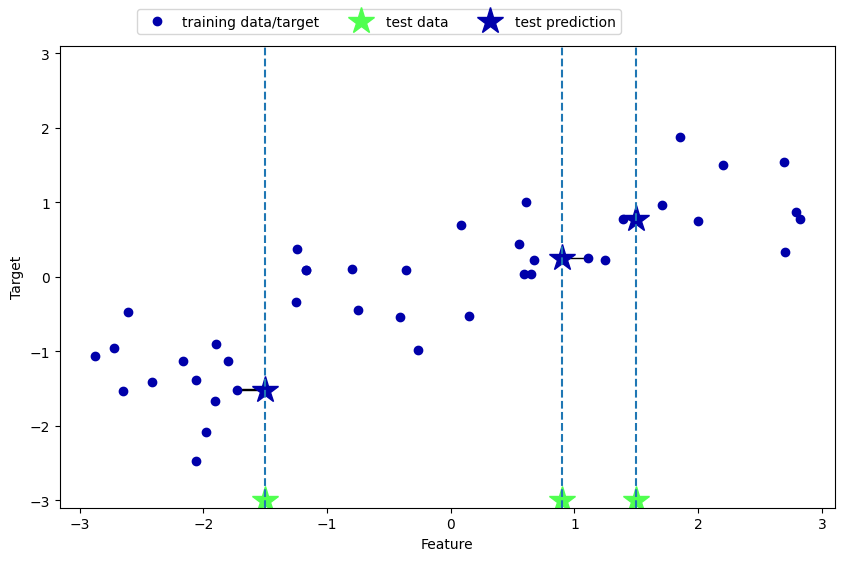

In [56]:
# plot of k-nn regression
# we have test_data on x-axis, draw a vertical line, 
# find the point where the distance is closest to the existing point
# that is the test prediction
mglearn.plots.plot_knn_regression(n_neighbors=1)

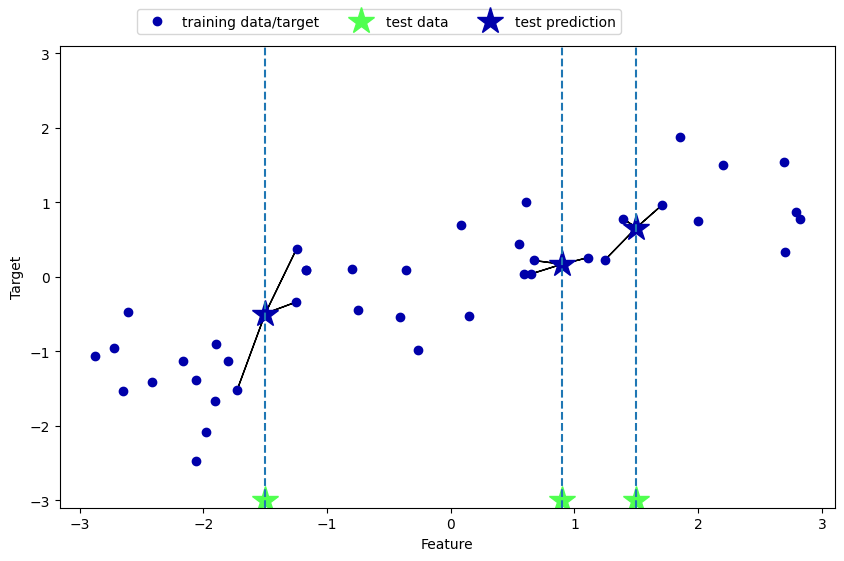

In [57]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [64]:
# sklearn
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and set n_neighbors=3
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [66]:
# predict
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [67]:
# re.score return r-squared
reg.score(X_test, y_test)

0.8344172446249605

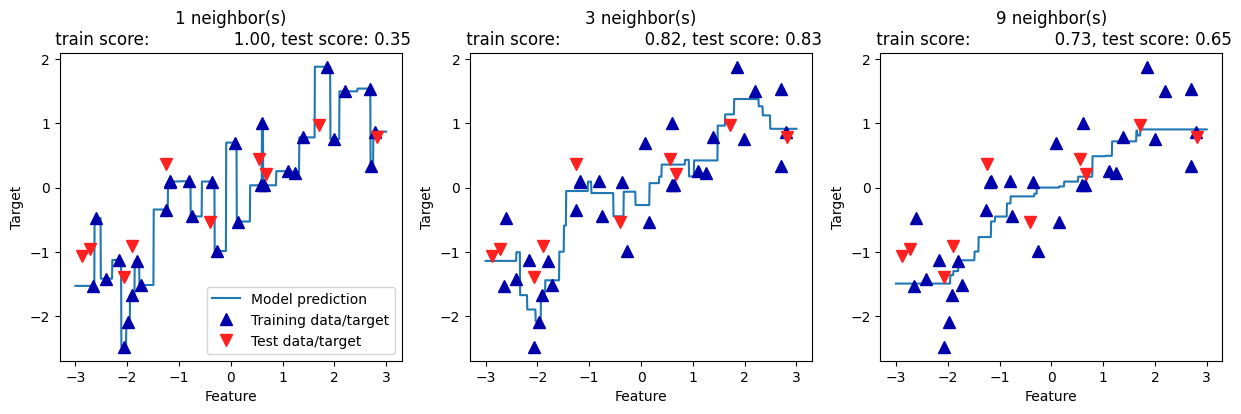

In [79]:
# test with different n_neighbors
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 points evenly spaced bt -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbor, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbor)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbor} neighbor(s)\n train score:\
                {reg.score(X_train, y_train):.2f}, test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model prediction", "Training data/target", "Test data/target"], loc="best")

### Conclusion

- Using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. 
- More neighbors leads to smoother predictions, but these do not fit the training data as well.
- The nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.